## 14. MS contacts and Schottky Diodes
### 14.1 Ideal MS Contacts
workfunction $\Phi$, metal workfunction $\Phi_M$, 3.66eV for magnesium, 5.15eV for Nikel\
semiconductor workfunction $\Phi_S$
$$\Phi_S=\chi+(E_C-E_F)_{FB}$$
electron affinity, $\chi=(E_0-E_C)|_{surface}$, $\chi=4.0eV, 4.03eV, 4.07eV$ for Ge, Si, GaAs\
$\Phi_M > \Phi_S$ metal to n-type semiconductors contact\
$\Phi_B=\Phi_M-\chi$  $ideal\ MS(n-tpye)\ contact$\
$\Phi_B$ is the surface potential-energy barrier encountered by electrons with E=EF\
$\Phi_B=E_G+\chi-\Phi_M$  $ideal\ MS(p-tpye)\ contact$

### 14.2 Schottky diode
### 14.2.1 Electrostatics
#### Built-in Voltage
$$V_{bi}=\frac{1}{q}\left[\Phi_B-(E_C-E_F)_{FB} \right] $$
$$\Phi_B=\Phi_M-\chi$$ for an ideal MS(n-type) contact
#### $\rho$, $\varepsilon$, $V$
#### Depletion Width


In [38]:
# Exercise 14.2
# Cu, n-type silicon, PHIM=4.65eV, Chi=4.03eV, ND-1e16/cm3, T=300K
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; ND=1e15; kT=k*T; Ks=e_si
PHIM=4.65
Chi=4.03
BH=PHIM-Chi
print(f"BH={BH:.2f}eV")

ECF=Eg(T)/2-kT*np.log(ND/ni(T)) #(EC-EF)_FB=ECF
print(f"ECF={ECF:.2f}eV")

#(EF-Ei)_FB=EFi, n-type kTln(ND/ni), p-type -kTln(NA/ni)
EFi=kT*np.log(ND/ni(T))
print(f"EFi={EFi:.2f}eV")
              
Vbi=(BH-ECF)
print(f"Vbi={Vbi:.2f}V")

W=np.sqrt(2*Ks*e0/(q*ND)*(Vbi-0))
print(f"W={W:.2e}cm")

E=q*ND/(Ks*e0)*W
print(f"E={E:.2e}V/cm")

BH=0.62eV
ECF=0.26eV
EFi=0.30eV
Vbi=0.36V
W=6.78e-05cm
E=1.05e+04V/cm


### 14.2.2 I-V Characteristics
$$I=I_s(e^{qV_A/kT}-1) $$
$$I_s=AA^*T^2e^{-\phi_B/kT}$$
$$A^*=\left(\frac{m_n^*}{m_0} \right)\frac{4\pi qm_0k^2}{h^3}$$

In [33]:
from constant import q,m0,e0,h,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt
A=4*np.pi*q*m0*kB**2/h**3*1e-4
print(f"A={A:.0f}A/cm2-K2")

A=120A/cm2-K2


**Schottky barrier lowering**
$$\Phi_B=\Phi_{B0}-\Delta \Phi_B $$
$$\Phi_B=q\left[\frac{q|\varepsilon_S|}{4\pi Ks \varepsilon_0} \right]^{1/2} $$

In [17]:
# 비선형 최소제곱회귀, log 변한없이 하려면, scipy를 이용, 하지만 정확도가 numpy보다 떨어진다.
# numpy는 선형회귀가 더 잘 fitting이 되지만 log로 변환해서 선형으로 만들어 주어야 한다.
# I=Is*exp(q*VA/(n1*kT))
# ln(I)=ln(Is)+q/(n1*kT)*VA
I=np.array([4.047e-7, 2.792e-6, 1.890e-5, 1.263e-4, 8.084e-4, 4.487e-3])
VA=np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35])
y=np.log(I)
c=np.polyfit(VA,y,1)  # c[0] = 기울기(slope), c[1] = ln(Is)
slope=c[0]
ln_Is=c[1]
kT_q=0.0259
n1=1/(kT_q*slope)
Is=np.exp(ln_Is)
print(f"Slope:{slope:.3f}, n1:{n1:.3f}, Is:{Is:.3e}")

Slope:37.413, n1:1.032, Is:1.022e-08


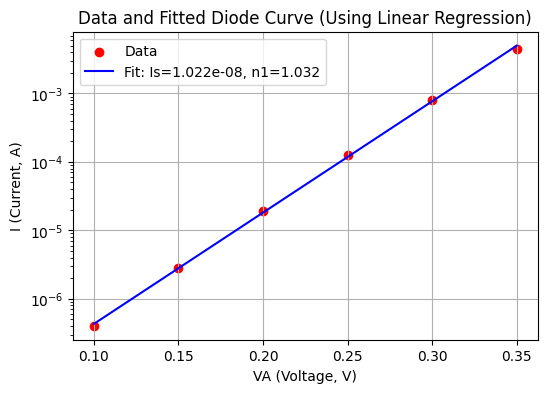

Slope: 37.41265067117735
n1 (이상성 계수): 1.032
Is (포화 전류): 1.022e-08


In [19]:
import numpy as np
import matplotlib.pyplot as plt

I = np.array([4.047e-7, 2.792e-6, 1.890e-5, 1.263e-4, 8.084e-4, 4.487e-3])
VA = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35])
kT_q = 0.0259  

# ln(I)=ln(Is)+q/(n1*kT)*VA
y = np.log(I)
c = np.polyfit(VA, y, 1)  #profit(x,y,1차식) c[0] = 기울기 (q / (n1 * kT)), c[1] = ln(Is)

slope = c[0]; ln_Is = c[1]
n1 = 1 / (kT_q * slope)
Is = np.exp(ln_Is)

y_fit = c[0] * VA + c[1]

plt.figure(figsize=(6, 4))
plt.scatter(VA, I, color='red', label='Data', marker='o')
plt.semilogy(VA, np.exp(y_fit), color='blue', label=f'Fit: Is={Is:.3e}, n1={n1:.3f}')
plt.title('Data and Fitted Diode Curve (Using Linear Regression)')
plt.xlabel('VA (Voltage, V)'), plt.ylabel('I (Current, A)')
plt.legend(), plt.grid(True)
plt.show()

# 결과 출력
print(f"Slope: {slope}")
print(f"n1 (이상성 계수): {n1:.3f}")
print(f"Is (포화 전류): {Is:.3e}")

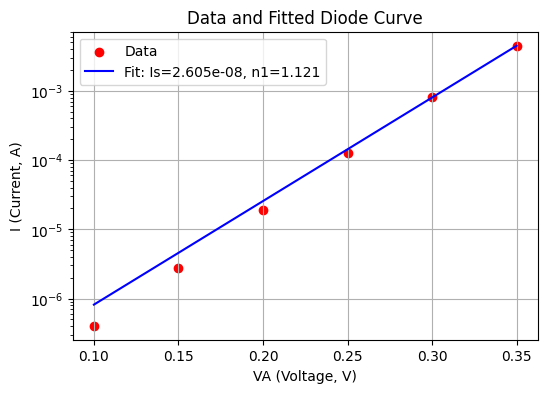

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

I = np.array([4.047e-7, 2.792e-6, 1.890e-5, 1.263e-4, 8.084e-4, 4.487e-3])
VA = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35])
kT_q = 0.0259  

def diode_eq(VA, Is, n1):
    return Is * np.exp(VA / (n1 * kT_q))  # (q는 이미 kT_q에 포함됨)

initial_guess = [1e-12, 1.0]
params, covariance = curve_fit(diode_eq, VA, I, p0=initial_guess)
Is_fit, n1_fit = params
I_fit = diode_eq(VA, Is_fit, n1_fit)

plt.figure(figsize=(6, 4))
plt.scatter(VA, I, color='red', label='Data', marker='o')
plt.semilogy(VA, I_fit, color='blue', label=f'Fit: Is={Is_fit:.3e}, n1={n1_fit:.3f}')
plt.title('Data and Fitted Diode Curve')
plt.xlabel('VA (Voltage, V)'), plt.ylabel('I (Current, A)')
plt.legend(), plt.grid(True)
plt.show()


### 14.2.3 a.c. Response
Although the reverse bais behavior is essentially identical to that of an asymmetrically doped pn junction diode, the forward bias a.c. response of the MS diode is significantly diferent. In the MS diode the diffusion component of the current is typically negligible. Thus there is very little minority carriers that give rise to the diffusion admittance, **the MS diode does not exhitbit a diffusion capacitance or diffusion conductance**.
$$\frac{1}{c^2}=\frac{2}{qN_DK_s\varepsilon_0A^2}(V_{bi}-V_A) $$

In [32]:
# Exercise 14.4  page 496
# Vbi=0.6V, A=1.5e-3cm2, 300K, estimate the barrier height, BH
# 1/C^2
from constant import q,m0,e0,h,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; kT=k*T; Ks=e_si; A=1.5e-3

Vbi=0.6 # x intercept
slope=-6e-3*(1e12)**2/(10.3+0.6) #pF2
print(f"slope={slope:.2}/F2-V")

ND=2/(q*Ks*e0*A**2*np.abs(slope))
print(f"ND={ND:.2e}/cm3")

ECF=Eg(T)/2-kT*np.log(ND/ni(T))
print(f"ECF={ECF:.2f}eV")

BH=Vbi+ECF
print(f"BH={BH:.2f}V")

slope=-5.5e+20/F2-V
ND=9.73e+15/cm3
ECF=0.21eV
BH=0.81V


### 14.2.4 Transient Response
### 14.3 Practical Contact Considerations
### 14.3.1 Rectifying Contacts
### 14.3.2 Ohmic Contacts
### 14.4 Summary

$$\Phi_S=\chi+(E_C-E_F)_{FB}=\chi+E_G/2-(E_F-E_i)_{FB} $$
$$(E_F-E_i)_{FB}=
\begin{cases}
kTln(N_D/n_i) & n-type \\
-kTln(N_A/n_i) & p-type
\end{cases} $$

In [52]:
# Problem 14.2 page 502
# PHIM=4eV, Chi=4.03eV, ND=1e15, T=300K
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; ND=1e15; kT=k*T; Ks=e_si; PHIM=4.00; Chi=4.03

BH=PHIM-Chi
ECF=Eg(T)/2-kT*np.log(ND/ni(T)) #(EC-EF)_FB=ECF
EFi=kT*np.log(ND/ni(T))
PHIS=Chi+Eg(T)/2-EFi
Vbi=(BH-ECF)
W=np.sqrt(2*Ks*e0/(q*ND)*(Vbi-VA))
E=q*ND/(Ks*e0)*W
print(f"BH={BH:.2f}eV, ECF={ECF:.2f}eV, EFi={EFi:.2f}eV, PHIS={PHIS:.2f}V, Vbi={Vbi:.2f}V, W={W:.2e}cm, E={E:.2e}V/cm")

BH=-0.03eV, ECF=0.26eV, EFi=0.30eV, PHIS=4.29V, Vbi=-0.29V, W=nancm, E=nanV/cm


C:\Users\ppjm7\AppData\Local\Temp\ipykernel_8100\3790210823.py:13: RuntimeWarning: invalid value encountered in sqrt
  W=np.sqrt(2*Ks*e0/(q*ND)*(Vbi-VA))


In [48]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; NA=1e16; kT=k*T; Ks=e_si; PHIM=4.25; Chi=4.03

#(EF-Ei)_FB=EFi, n-type kTln(ND/ni), p-type -kTln(NA/ni)
EFi=-kT*np.log(NA/ni(T))
print(f"EFi={EFi:.2f}eV")

PHIS=Chi+Eg(T)/2-EFi
print(f"PHIS={PHIS:.2f}V")


EFi=-0.36eV
PHIS=4.95V


In [51]:
# Problem 14.3 page 502
# Au PHIM=5.1eV, Chi=4.03eV, ND=1e15, T=300K
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; ND=1e15; kT=k*T; Ks=e_si; PHIM=5.1; Chi=4.03; VA=0

BH=PHIM-Chi
ECF=Eg(T)/2-kT*np.log(ND/ni(T)) #(EC-EF)_FB=ECF
EFi=kT*np.log(ND/ni(T))
PHIS=Chi+Eg(T)/2-EFi
Vbi=(BH-ECF)
W=np.sqrt(2*Ks*e0/(q*ND)*(Vbi-VA))
E=q*ND/(Ks*e0)*W
print(f"BH={BH:.2f}eV, ECF={ECF:.2f}eV, EFi={EFi:.2f}eV, PHIS={PHIS:.2f}V, Vbi={Vbi:.2f}V, W={W:.2e}cm, E={E:.2e}V/cm")

BH=1.07eV, ECF=0.26eV, EFi=0.30eV, PHIS=4.29V, Vbi=0.81V, W=1.02e-04cm, E=1.58e+04V/cm


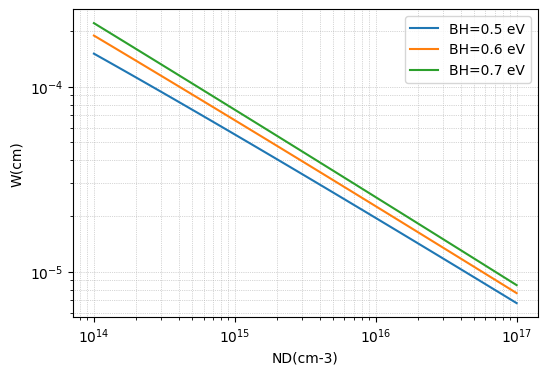

In [80]:
# Problem 14.4 page 502
# BH=0.5eV, 0.6eV, 0.7eV, ND=1e15~1e17, T=300K
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; kT=k*T; EG=Eg(T); ni=ni(T); Ks=e_si
BH=np.array([0.5, 0.6, 0.7])
ND=np.logspace(14,17,101)
W0=[]
for i in range(len(BH)):
    ECF=EG/2-kT*np.log(ND/ni)
    Vbi=BH[i]-ECF
    W=np.sqrt((2*Ks*e0*Vbi)/(q*ND))
    W0.append(W) # 리스트에 추가

W0 = np.vstack(W0) # 리스트를 NumPy 배열로 변환 (2D 배열, shape: (3, len(ND)))

plt.figure(figsize=(6, 4))
for i in range(len(BH)):
    plt.loglog(ND, W0[i], label=f"BH={BH[i]:.1f} eV")
    
plt.xlabel("ND(cm-3)"), plt.ylabel("W(cm)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

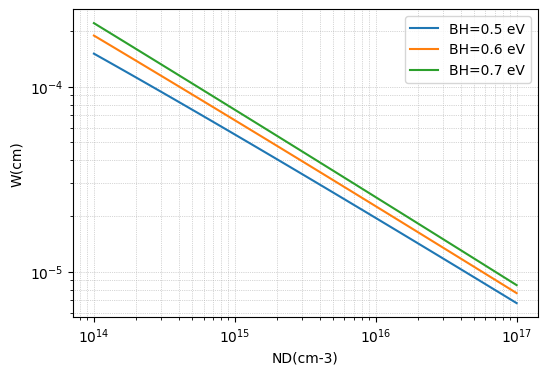

In [85]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; kT=k*T; EG=Eg(T); ni=ni(T); Ks=e_si

BH=np.array([0.5, 0.6, 0.7])
ND=np.logspace(14,17,101)

plt.figure(figsize=(6, 4))
for i in range(len(BH)):
    ECF=EG/2-kT*np.log(ND/ni)
    Vbi=BH[i]-ECF
    W0= np.sqrt((2*Ks*e0*Vbi)/(q*ND))
    plt.loglog(ND, W0, label=f"BH={BH[i]:.1f} eV")
    
plt.xlabel("ND(cm-3)"), plt.ylabel("W(cm)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

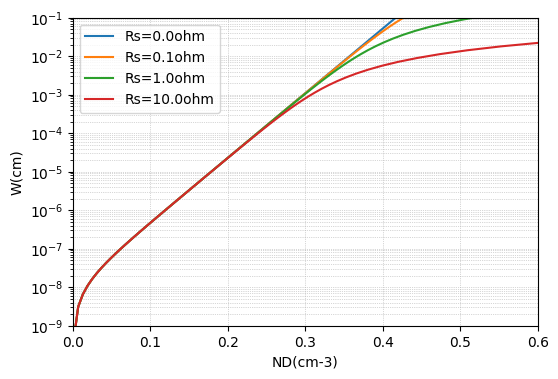

In [89]:
# Problem 14.8
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; kT=k*T; Is=1e-8 

Rs=np.array([0, 0.1, 1.0, 10])
VJ=np.linspace(0.001,0.6,101)

plt.figure(figsize=(6, 4))
for i in range(len(Rs)):
    I=Is*(np.exp(VJ/kT)-1)
    VA=VJ+I*Rs[i]
    plt.semilogy(VA,I,label=f"Rs={Rs[i]:.1f}ohm")
    
plt.xlabel("ND(cm-3)"), plt.ylabel("W(cm)")
plt.xlim(0,0.6), plt.ylim(1e-9,0.1)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

Problem 14.10
$$\Delta Phi_B=\left(\frac{q|\varepsilon_s}{4\pi K_s\varepsilon_0}\right)^{1/2}$$
$$|\varepsilon_s|=\frac{qN_D}{K_s\varepsilon_0}W=\left[\frac{2qN_D}{K_s\varepsilon_0}(V_{bi}-V_A) \right]^{1/2} $$
$$V_bi=\frac{1}{q}[\Phi_B-(E_C-E_F)_{FB}] $$
$$(E_C-E_F)_{FB}=E_G/2-(E_F-E_i)_{FB}=E_G/2-kTln(N_D/n_i) $$
For part (b)
$$\frac{I_S(V_A)}{I_S(V_A=0)}=\frac{e^{\Phi_B(V_A)/kT}}{e^{\Phi_B(0)/kT}}=e^{[\Phi_B(0)-\Phi_B(V_A)]/kT}=e^{[\Delta\Phi_B(V_A)-\Delta\Phi_B(0)]/kT} $$

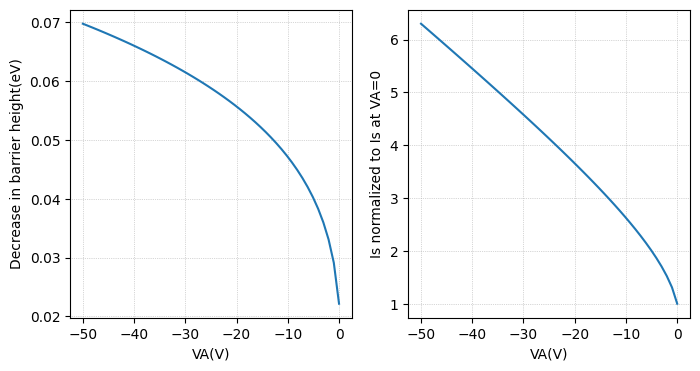

In [1]:
# Problem 14.10 page 504
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; kT=k*T; Ks=e_si; Eg=Eg(T); ni=ni(T); ND=1e16; BH=0.72
VA=np.linspace(-50,0)
ECF=Eg/2-kT*np.log(ND/ni)
Vbi=BH-ECF
ES=np.sqrt((2*q*ND)/(Ks*e0)*(Vbi-VA)) #Electric field at surface
DBH=np.sqrt((q*ES)/(4*np.pi*Ks*e0)) #Delta barrier height

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(VA,DBH)
plt.xlabel("VA(V)"), plt.ylabel("Decrease in barrier height(eV)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

ISn=np.exp((DBH-DBH[-1])/kT)
plt.subplot(122)
plt.plot(VA,ISn)
plt.xlabel("VA(V)"), plt.ylabel("Is normalized to Is at VA=0")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.show()

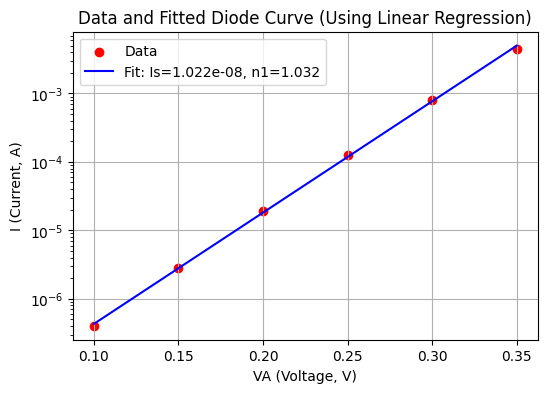

Slope: 37.41265067117735
n1 (이상성 계수): 1.032
Is (포화 전류): 1.022e-08


In [2]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

I=np.array([4.047e-7, 2.792e-6, 1.890e-5, 1.263e-4, 8.084e-4, 4.487e-3])
VA = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35])
kT_q = 0.0259  

# ln(I)=ln(Is)+q/(n1*kT)*VA
y = np.log(I)
c = np.polyfit(VA, y, 1)  #profit(x,y,1차식) c[0] = 기울기 (q / (n1 * kT)), c[1] = ln(Is)

slope = c[0]; ln_Is = c[1]
n1 = 1 / (kT_q * slope)
Is = np.exp(ln_Is)

y_fit = c[0] * VA + c[1]

plt.figure(figsize=(6, 4))
plt.scatter(VA, I, color='red', label='Data', marker='o')
plt.semilogy(VA, np.exp(y_fit), color='blue', label=f'Fit: Is={Is:.3e}, n1={n1:.3f}')
plt.title('Data and Fitted Diode Curve (Using Linear Regression)')
plt.xlabel('VA (Voltage, V)'), plt.ylabel('I (Current, A)')
plt.legend(), plt.grid(True)
plt.show()

# 결과 출력
print(f"Slope: {slope}")
print(f"n1 (이상성 계수): {n1:.3f}")
print(f"Is (포화 전류): {Is:.3e}")

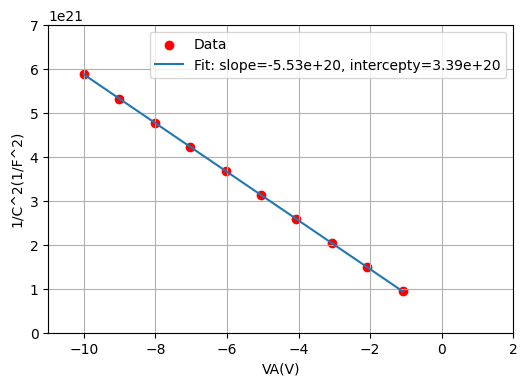

Vbi:0.61, ND:9.69e+15, Slope:-5.53e+20/F^2-V, intercepty=3.39e+20/F^2, Barrier hight:0.82


In [50]:
# Problem 14.11 1/C^2 vs VA plot, Eq. 14.30 page 493
# 1/C^2=2/(q*ND*Ks*e0*A^2)*(Vbi-VA)
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

A=1.5e-3; Ks=e_si
VA=-np.array([1.09,2.08,3.07,4.06,5.05,6.04,7.03,8.02,9.01,10])
Y=1e21*np.array([0.953,1.494,2.035,2.579,3.125,3.673,4.217,4.763,5.320,5.890]) #1/C^2

p=np.polyfit(VA, Y, 1) # 1/C^2(Y)=2/(q*ND*Ks*e0*A^2)*(Vbi-VA)
Vbi=-p[1]/p[0] #slope=p[0]; intercepty=p[1]
ND=2/(q*Ks*e0*A**2*(-p[0])) #-slope=2/(q*ND*Ks*e0*A^2)
Y_fit=p[0]*VA+p[1]

Eg=Eg(T); ni=ni(T); kT=k*T
ECF=Eg/2-kT*np.log(ND/ni)
BH=Vbi+ECF

plt.figure(figsize=(6, 4))
plt.scatter(VA, Y, color='red', label='Data', marker='o')
#plt.plot(VA, p[0]*VA+p[1])
plt.plot(VA, Y_fit, label=f'Fit: slope={p[0]:.2e}, intercepty={p[1]:.2e}')
plt.xlabel('VA(V)'), plt.ylabel('1/C^2(1/F^2)')
plt.xlim(-11,2), plt.ylim(0,7e21)
plt.legend(), plt.grid(True)
plt.show()

print(f"Vbi:{Vbi:.2f}, ND:{ND:.2e}, Slope:{p[0]:.2e}/F^2-V, intercepty={p[1]:.2e}/F^2, Barrier hight:{BH:.2f}")

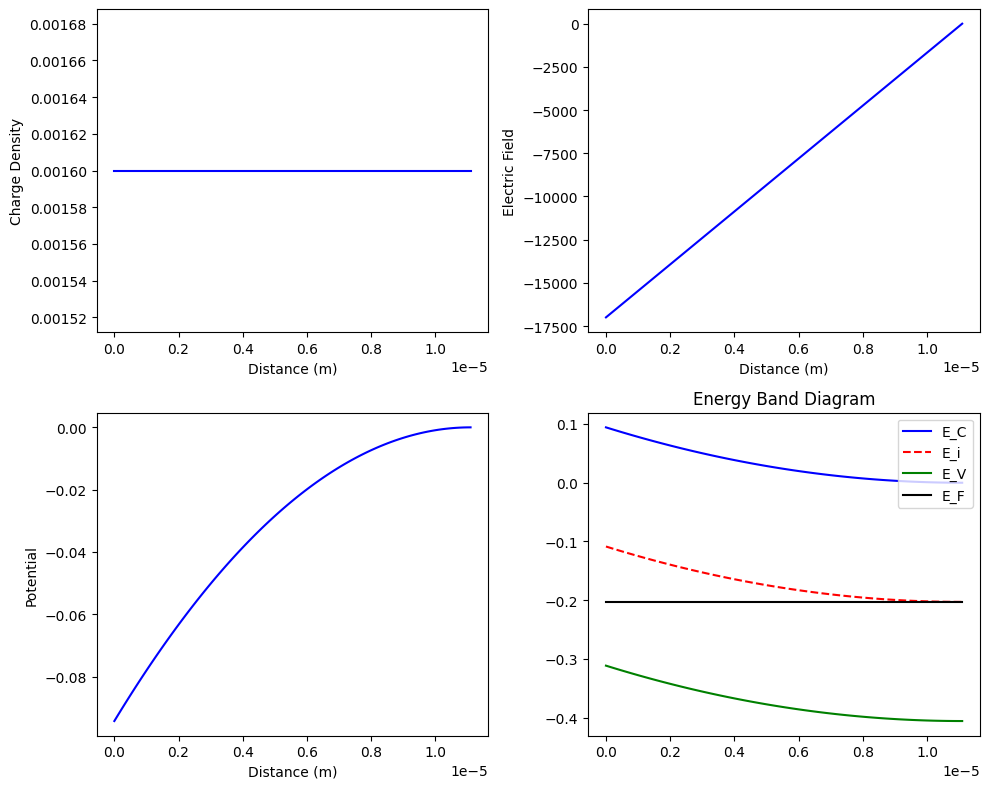

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 8.617e-5  # eV/K
T = 300        # Temperature in K
kT = k * T
q = 1.6e-19    # Electron charge (C)
Ks = 11.8      # Relative permittivity of silicon
NA = 1.0e16    # Acceptor concentration (cm^-3)
e0 = 8.85e-14  # Permittivity of free space (F/cm)
Eg = 1.12      # Band gap energy (eV)
ni = 1.0e10    # Intrinsic carrier concentration (cm^-3)
phiM = 4.65    # Metal work function (eV)
phiS = 4.03    # Semiconductor work function (eV)

# Calculations
Ecvfb = Eg / 2 - (kT * np.log(NA / ni))
X = phiS - Ecvfb
phiB = Eg + X - phiM
Vbi = phiB - Ecvfb
W = np.sqrt(((2 * Ks * e0) / (q * NA)) * Vbi)

rho = q * NA
E = -((q * NA) / (Ks * e0))
V = -((q * NA) / (2 * Ks * e0))

# Plot settings
x_vals = np.linspace(0, W, 100)
charge_density = np.full_like(x_vals, rho)
electric_field = E * (W - x_vals)
electric_potential = V * (W - x_vals) ** 2
Ec = -electric_potential
Ei = Ec - Ecvfb
Ev = Ec - 2 * Ecvfb
Ef = np.full_like(x_vals, -0.2028)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Charge Density
axes[0, 0].plot(x_vals, charge_density, 'b')
axes[0, 0].set_xlabel('Distance (m)')
axes[0, 0].set_ylabel('Charge Density')

# Electric Field
axes[0, 1].plot(x_vals, electric_field, 'b')
axes[0, 1].set_xlabel('Distance (m)')
axes[0, 1].set_ylabel('Electric Field')

# Electric Potential
axes[1, 0].plot(x_vals, electric_potential, 'b')
axes[1, 0].set_xlabel('Distance (m)')
axes[1, 0].set_ylabel('Potential')

# Energy Band Diagram
axes[1, 1].plot(x_vals, Ec, 'b', label='E_C')
axes[1, 1].plot(x_vals, Ei, 'r--', label='E_i')
axes[1, 1].plot(x_vals, Ev, 'g', label='E_V')
axes[1, 1].plot(x_vals, Ef, 'k', label='E_F')
axes[1, 1].set_title('Energy Band Diagram')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

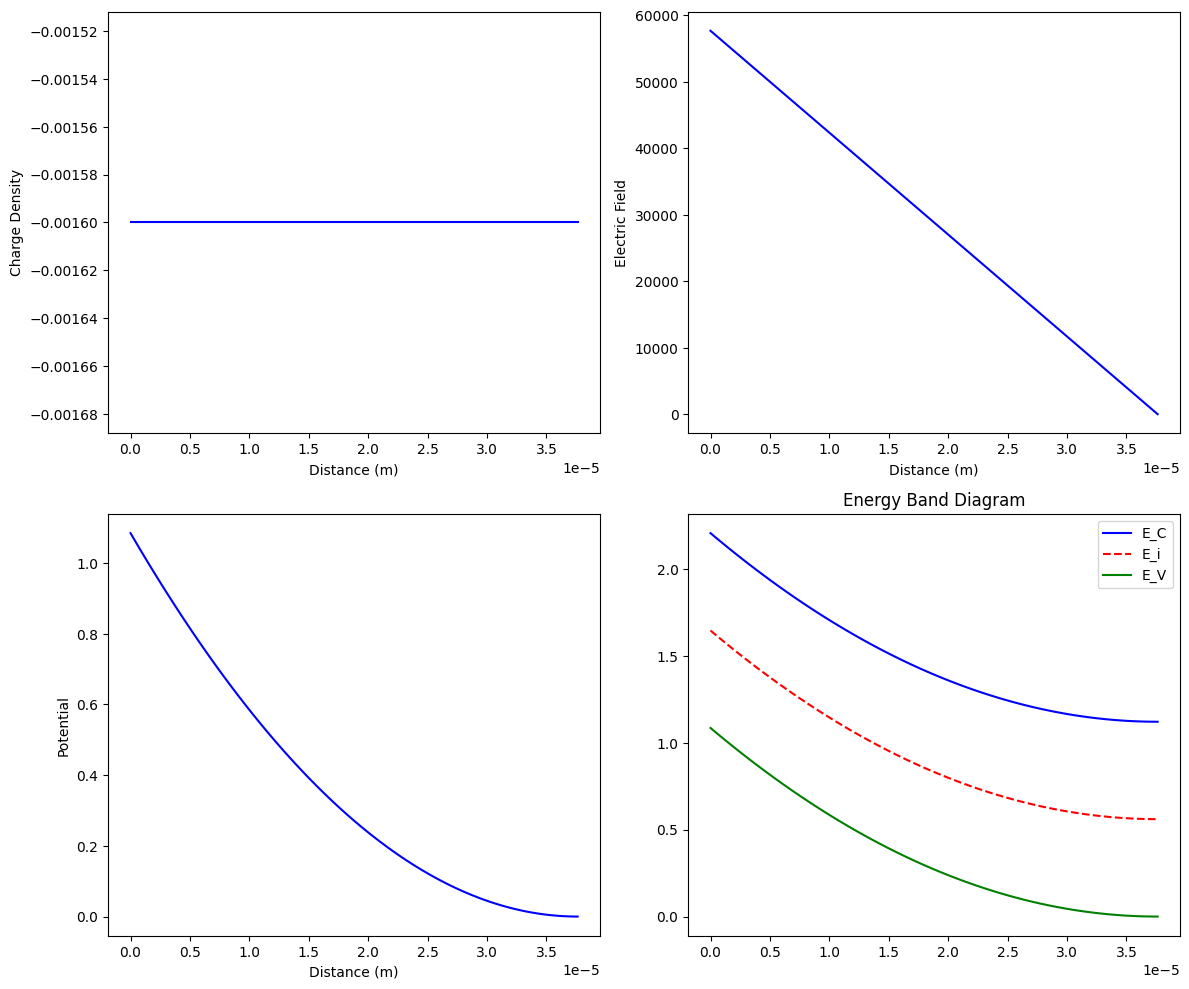

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 8.617e-5  # eV/K
T = 300        # Temperature in K
kT = k * T
q = 1.6e-19    # Electron charge (C)
Ks = 11.8      # Relative permittivity of silicon
e0 = 8.85e-14  # Permittivity of free space (F/cm)
Eg = 1.12      # Band gap energy (eV)
ni = 1.0e10    # Intrinsic carrier concentration (cm^-3)
phiM = 3.66    # Metal work function (eV)
phiS = 4.03    # Semiconductor work function (eV)
NA = 1.0e16    # Doping concentration (cm^-3)

# Calculations
Ecvfb = Eg / 2 - (kT * np.log(NA / ni))
X = phiS - Ecvfb
phiB = Eg + X - phiM
Vbi = phiB - Ecvfb
Vbi = max(Vbi, 1e-3)  # Ensure Vbi is non-negative

W = np.sqrt(((2 * Ks * e0) / (q * NA)) * Vbi)
rho = q * NA
E = -(q * NA) / (Ks * e0)
V = -(q * NA) / (2 * Ks * e0)

x_vals = np.linspace(0, max(W, 1e-9), 100)  # Ensure valid x-values
charge_density = -np.full_like(x_vals, rho)
electric_field = -E * (W - x_vals)
electric_potential = -V * (W - x_vals) ** 2
Ec = electric_potential + 1.12
Ei = electric_potential + 0.56
Ev = electric_potential

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Charge Density
axes[0, 0].plot(x_vals, charge_density, 'b')
axes[0, 0].set_xlabel('Distance (m)')
axes[0, 0].set_ylabel('Charge Density')

# Electric Field
axes[0, 1].plot(x_vals, electric_field, 'b')
axes[0, 1].set_xlabel('Distance (m)')
axes[0, 1].set_ylabel('Electric Field')

# Electric Potential
axes[1, 0].plot(x_vals, electric_potential, 'b')
axes[1, 0].set_xlabel('Distance (m)')
axes[1, 0].set_ylabel('Potential')

# Energy Band Diagram
axes[1, 1].plot(x_vals, Ec, 'b', label='E_C')
axes[1, 1].plot(x_vals, Ei, 'r--', label='E_i')
axes[1, 1].plot(x_vals, Ev, 'g', label='E_V')
axes[1, 1].set_title('Energy Band Diagram')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
